In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
import optuna
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white")

In [2]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.shape

(58645, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
cate_cols = df.select_dtypes(include='object').columns
print('Catgorical columns:', cate_cols)

Catgorical columns: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [7]:
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]

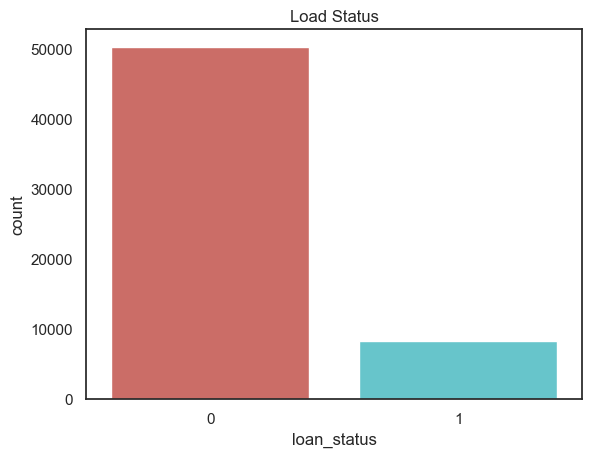

In [11]:
sns.countplot(x='loan_status',data=df,palette='hls')
plt.title('Load Status')
plt.show()

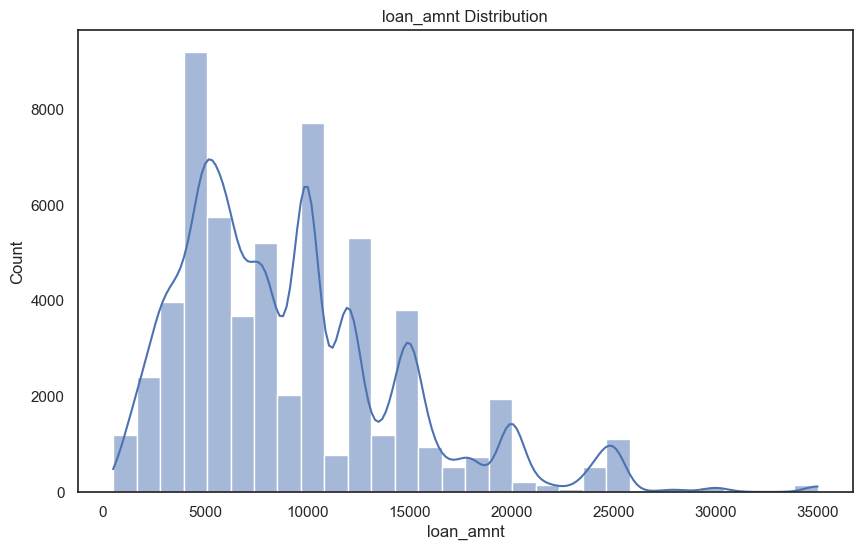

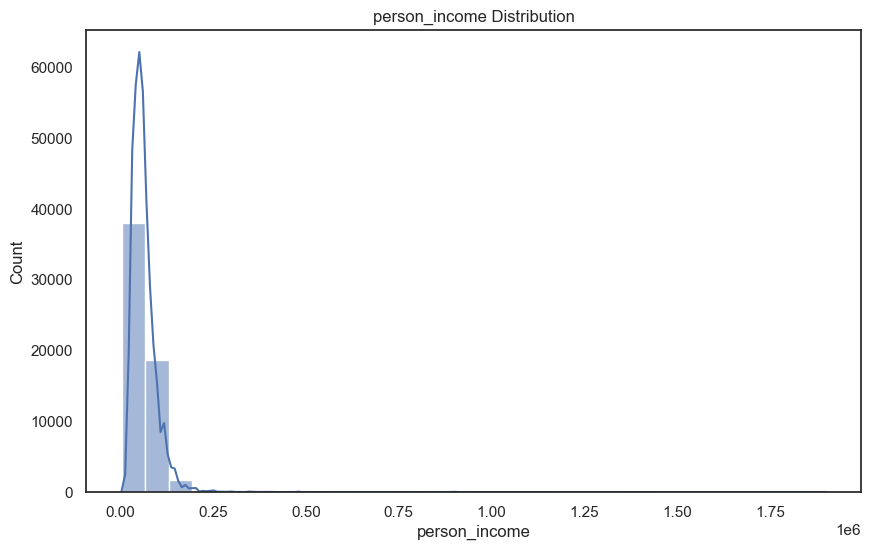

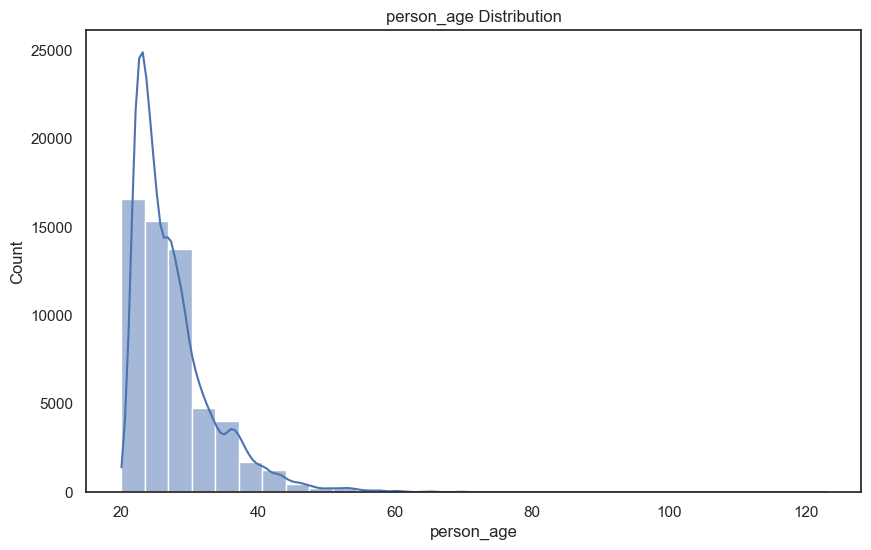

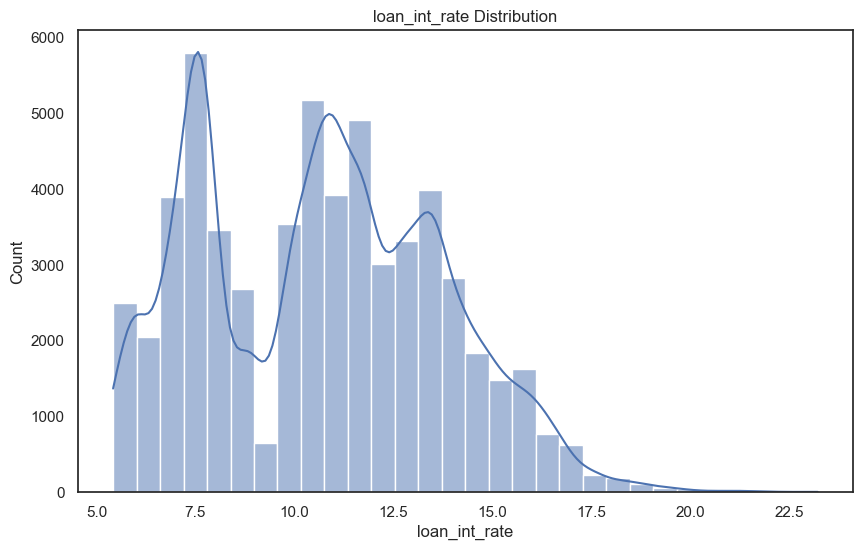

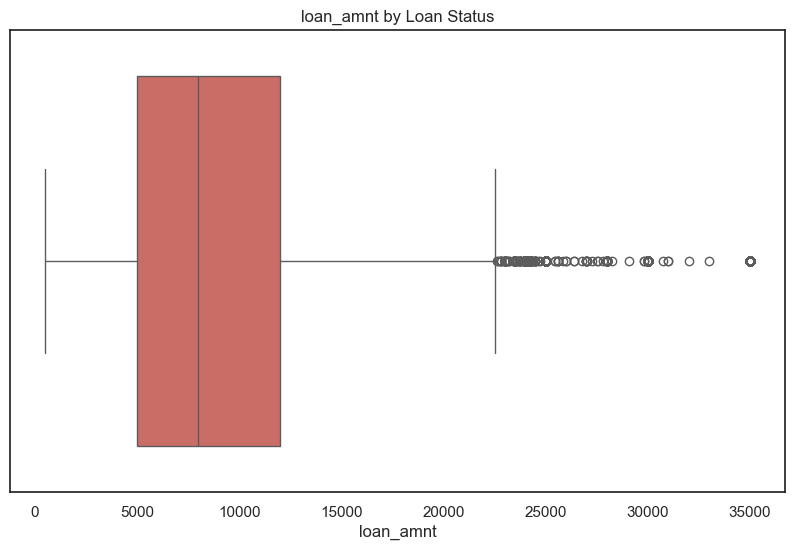

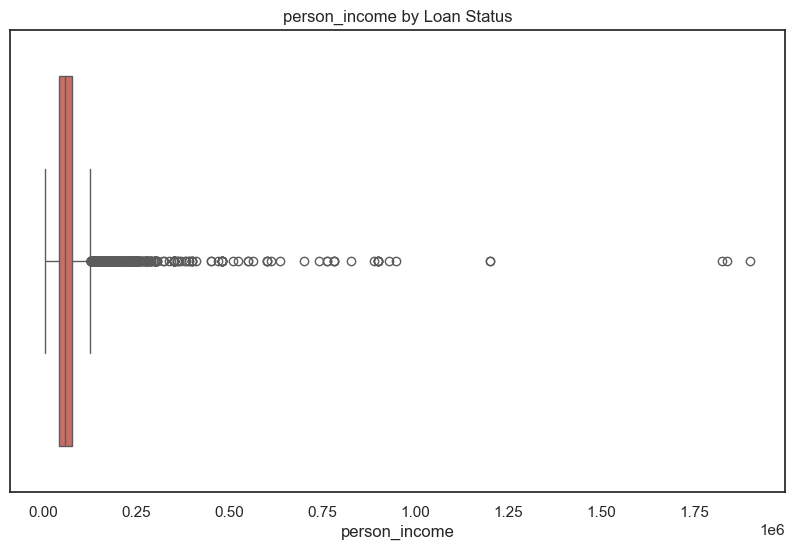

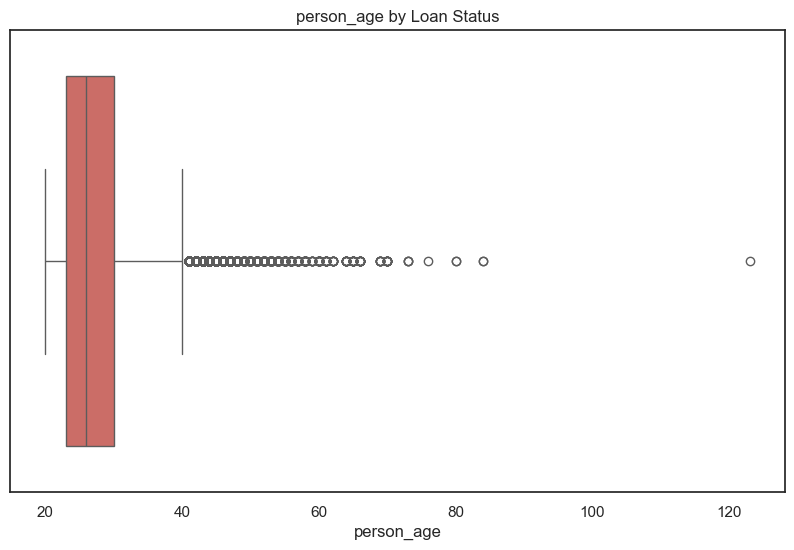

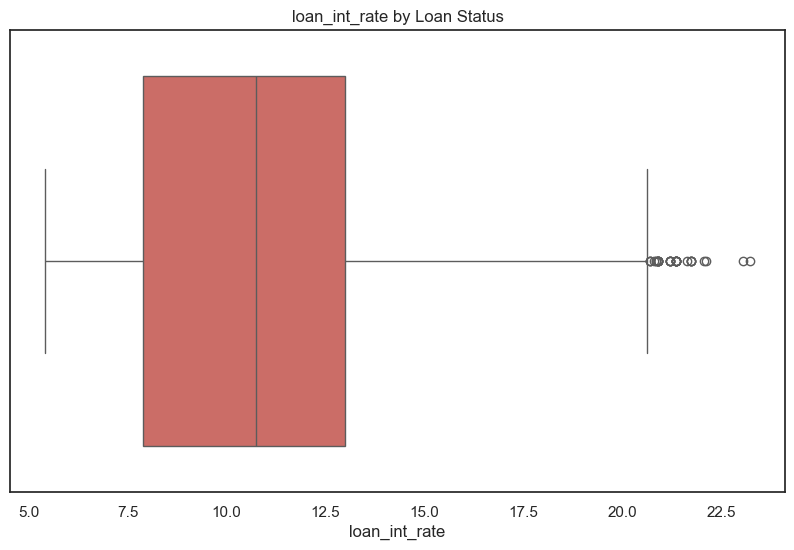

In [13]:
numerical_cols = ['loan_amnt', 'person_income', 'person_age', 'loan_int_rate']

for col in numerical_cols:
	plt.figure(figsize=(10,6))
	sns.histplot(df[col].dropna(), kde=True, bins=30, palette='hls')
	plt.title(f'{col} Distribution')
	plt.show()

for col in numerical_cols:
	plt.figure(figsize=(10,6))
	sns.boxplot(x=df[col],palette='hls')
	plt.title(f'{col} by Loan Status')
	plt.show()

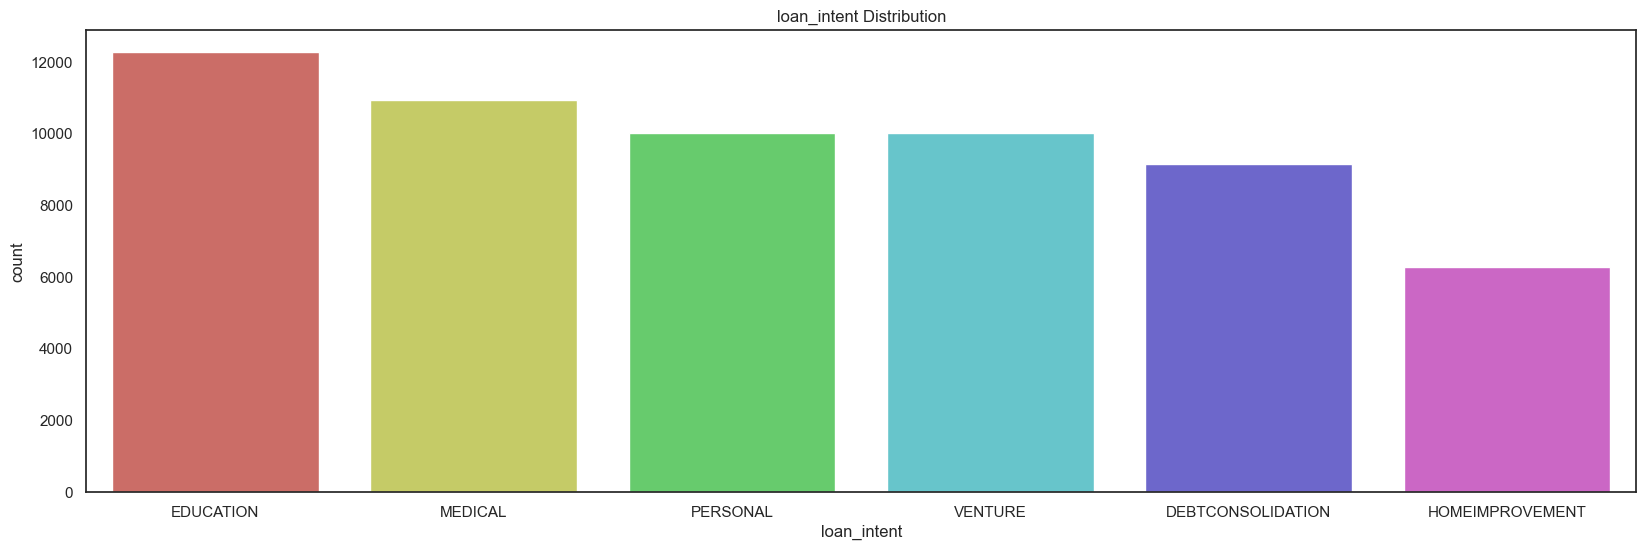

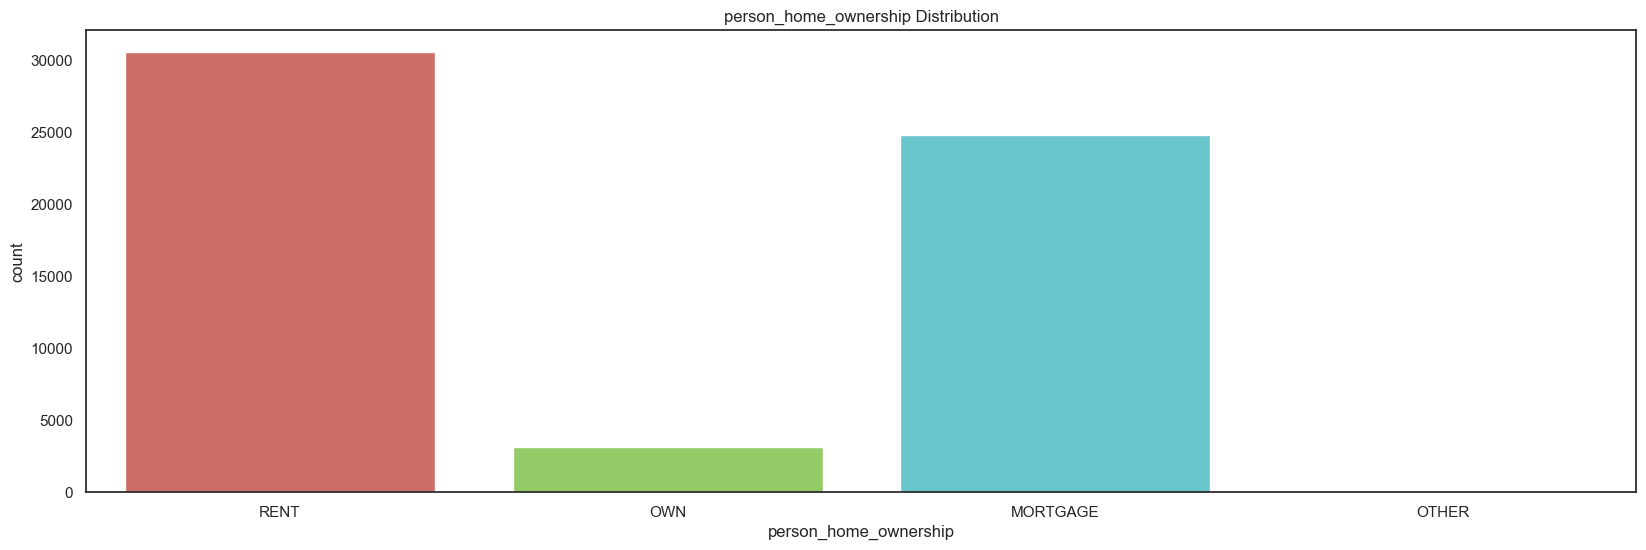

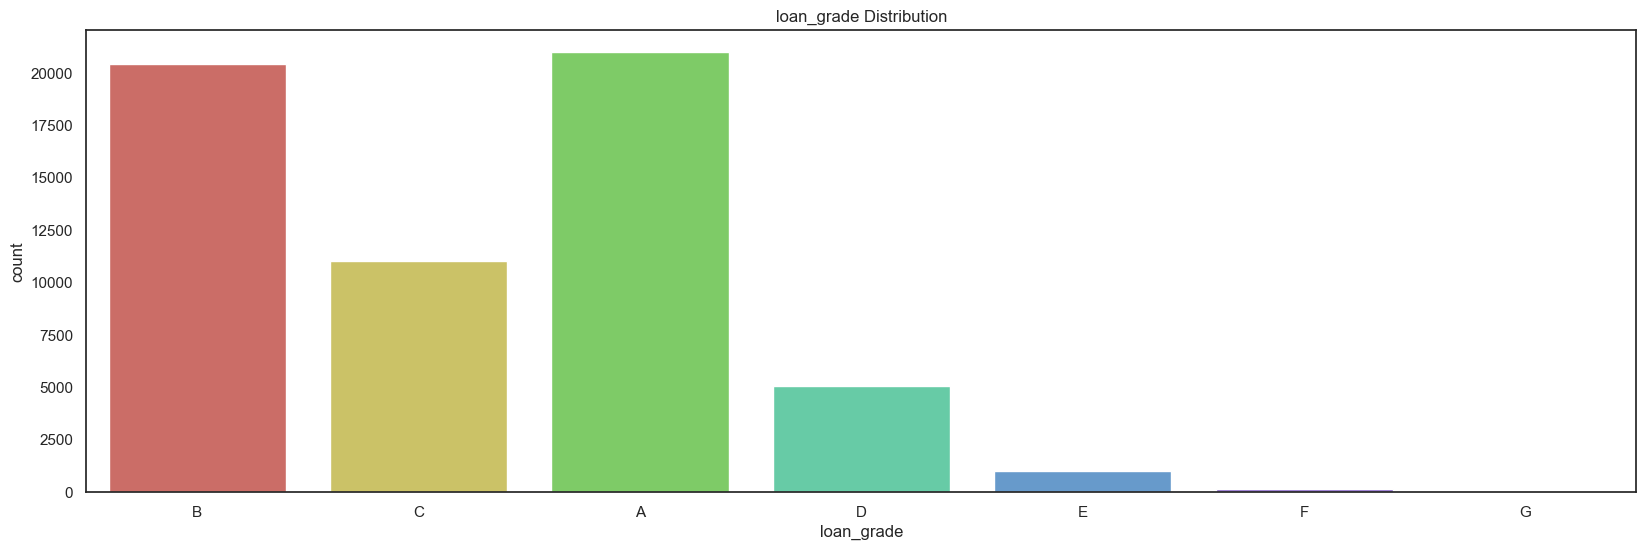

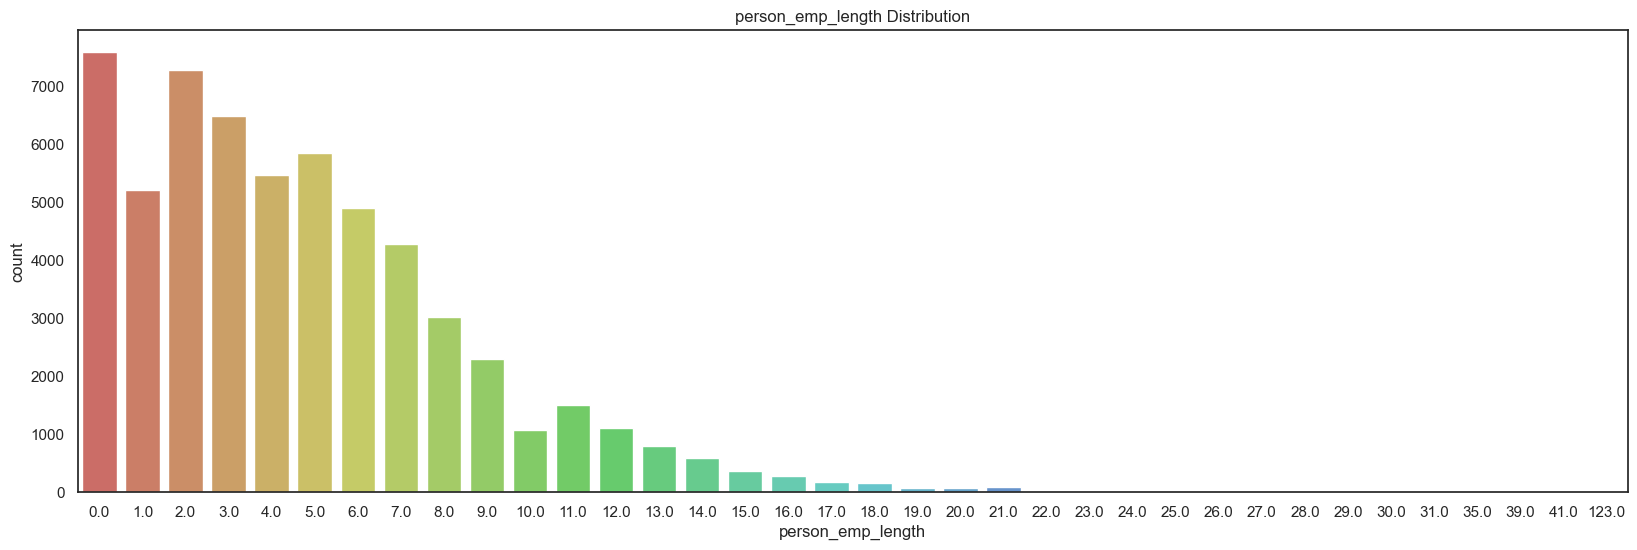

In [14]:
categroical_cols = ['loan_intent', 'person_home_ownership', 'loan_grade', 'person_emp_length']

for col in categroical_cols:
	plt.figure(figsize=(20,6))
	sns.countplot(x=col, data=df, palette='hls')
	plt.title(f'{col} Distribution')
	plt.show()

## relations between target and features

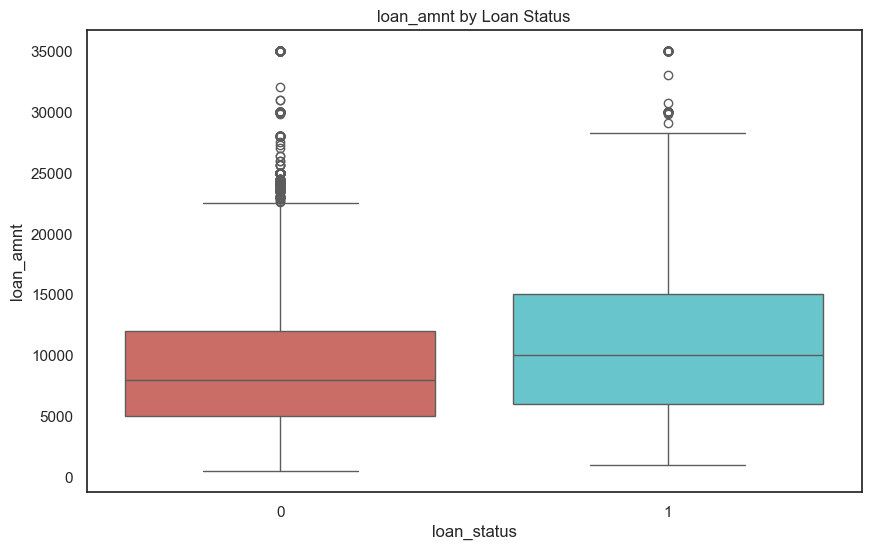

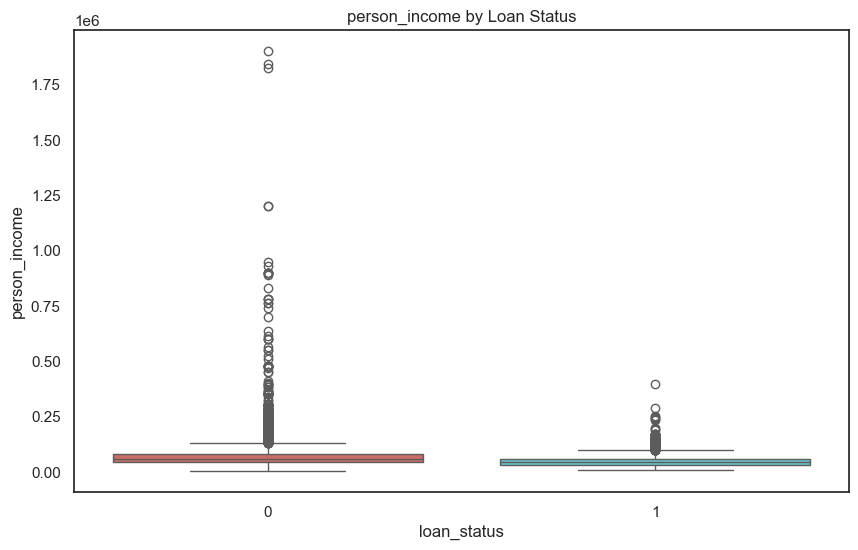

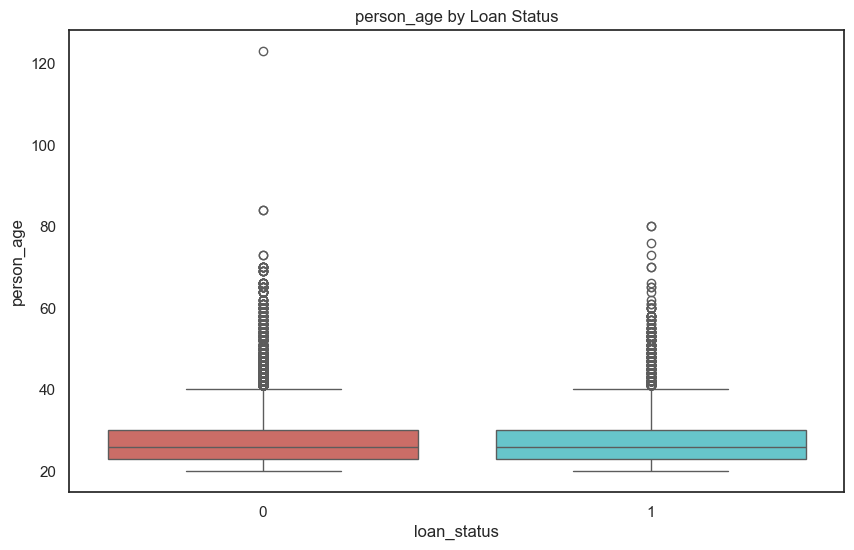

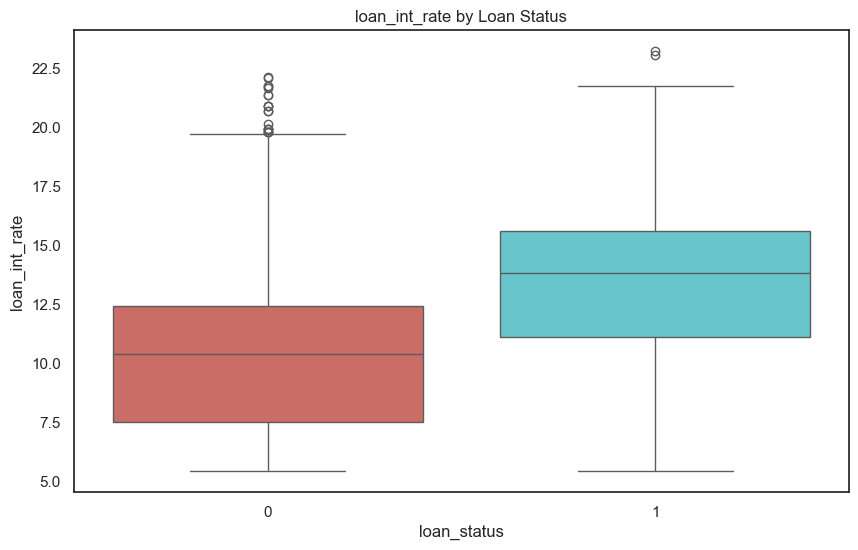

In [15]:
for col in numerical_cols:
	plt.figure(figsize=(10,6))
	sns.boxplot(x='loan_status', y=col, data=df, palette='hls')
	plt.title(f'{col} by Loan Status')
	plt.show()

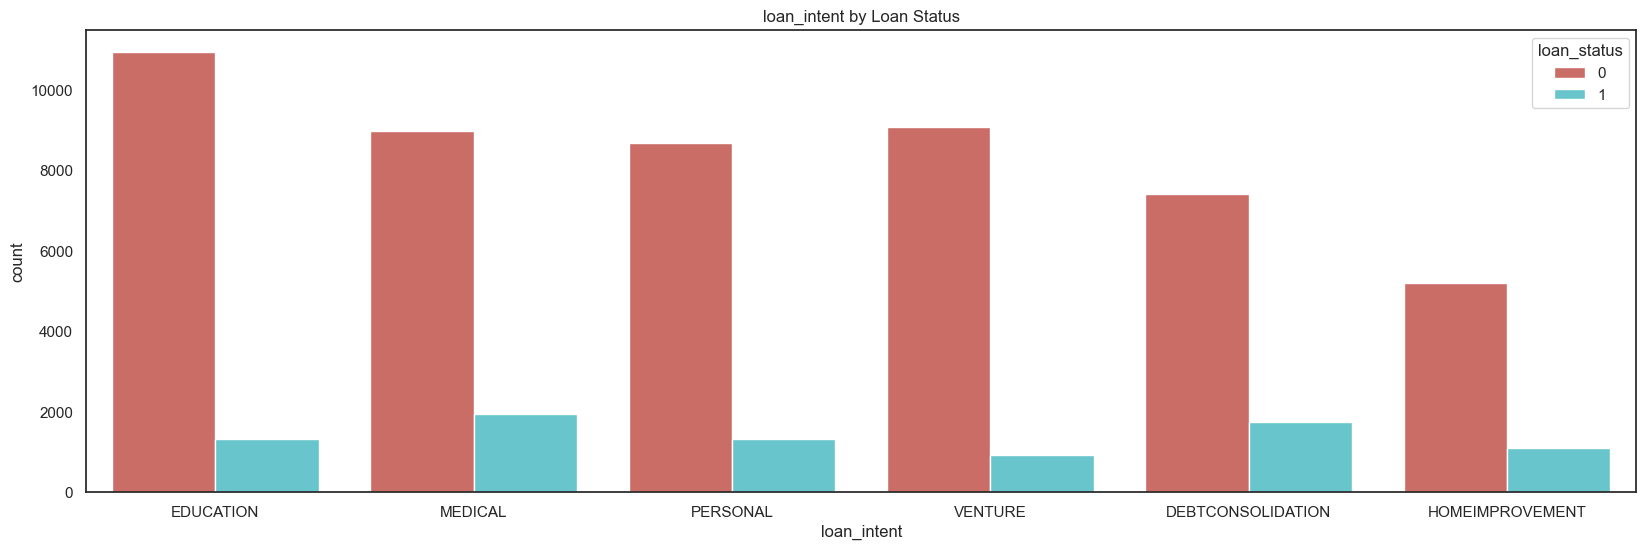

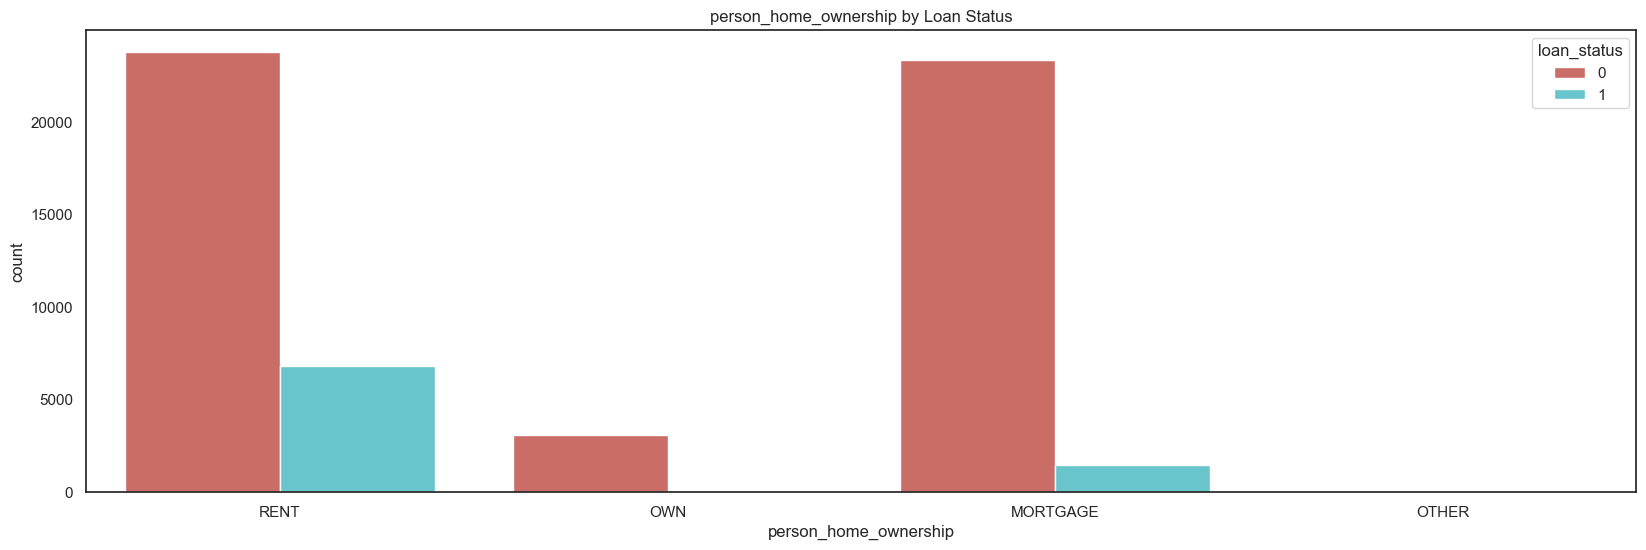

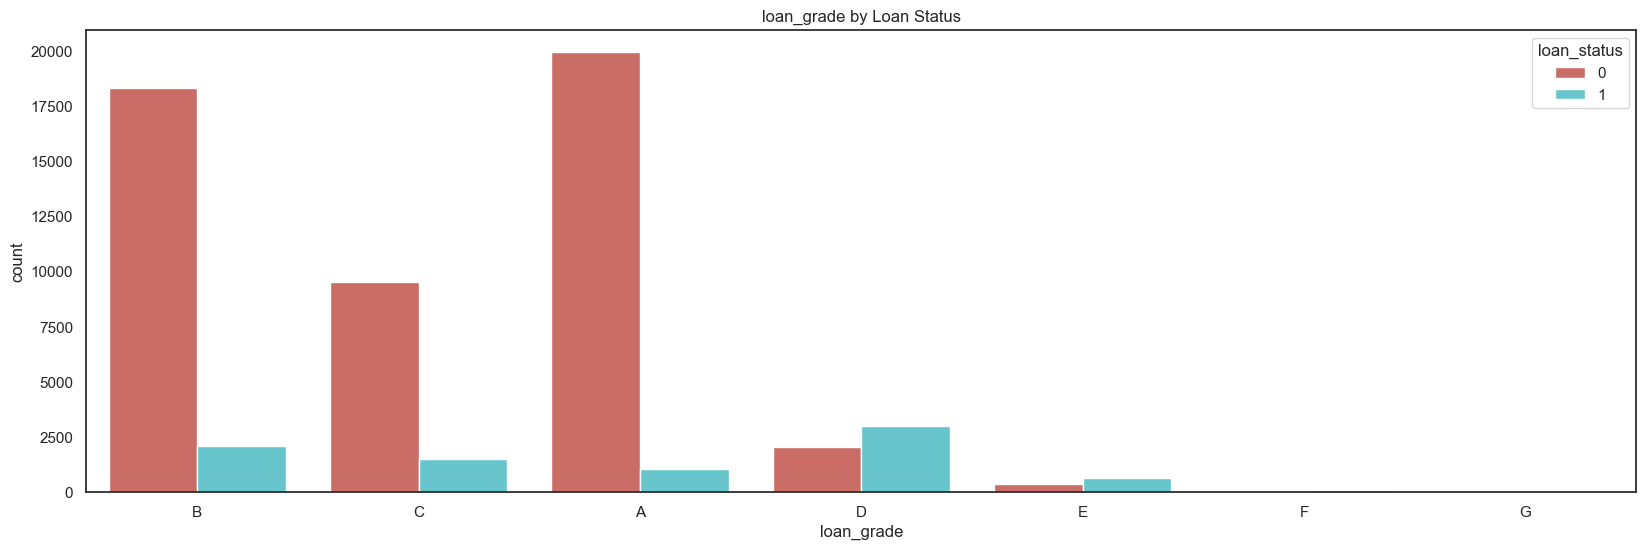

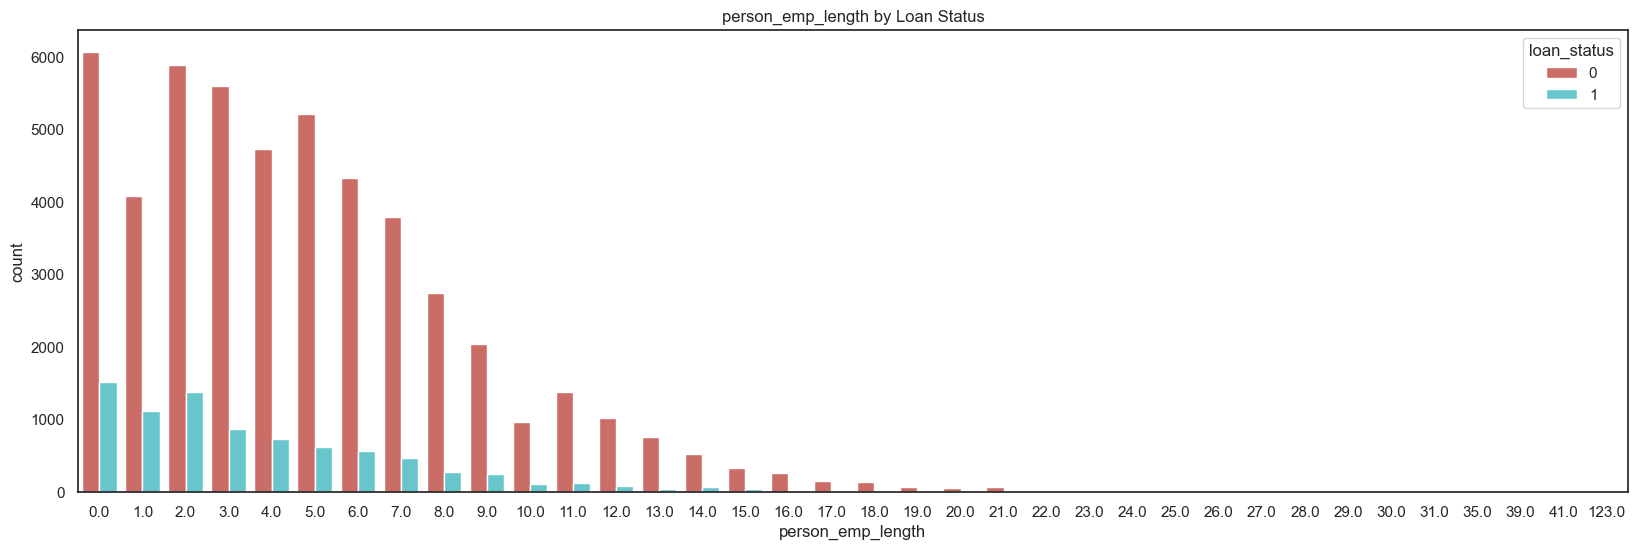

In [16]:
for col in categroical_cols:
	plt.figure(figsize=(20,6))
	sns.countplot(x=col, hue='loan_status', data=df, palette='hls')
	plt.title(f'{col} by Loan Status')
	plt.show()

## Correlation Matrix

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head().columns

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

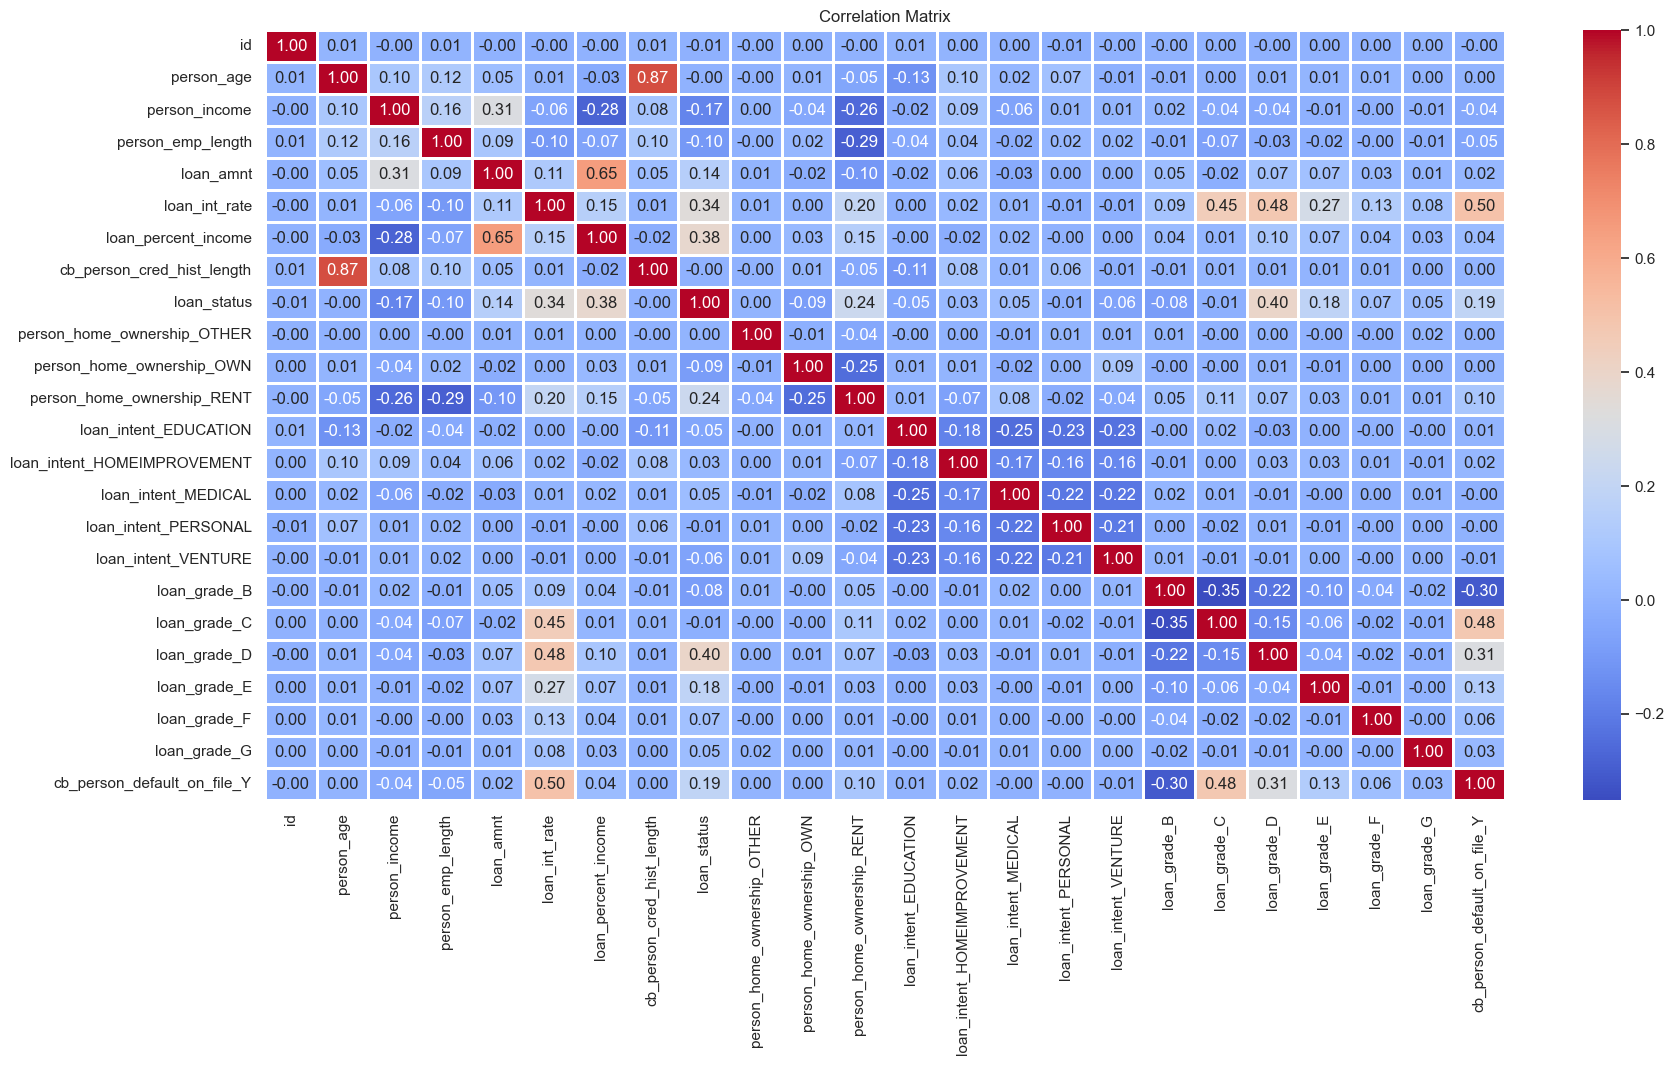

In [18]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=2)

plt.title('Correlation Matrix')

plt.show()

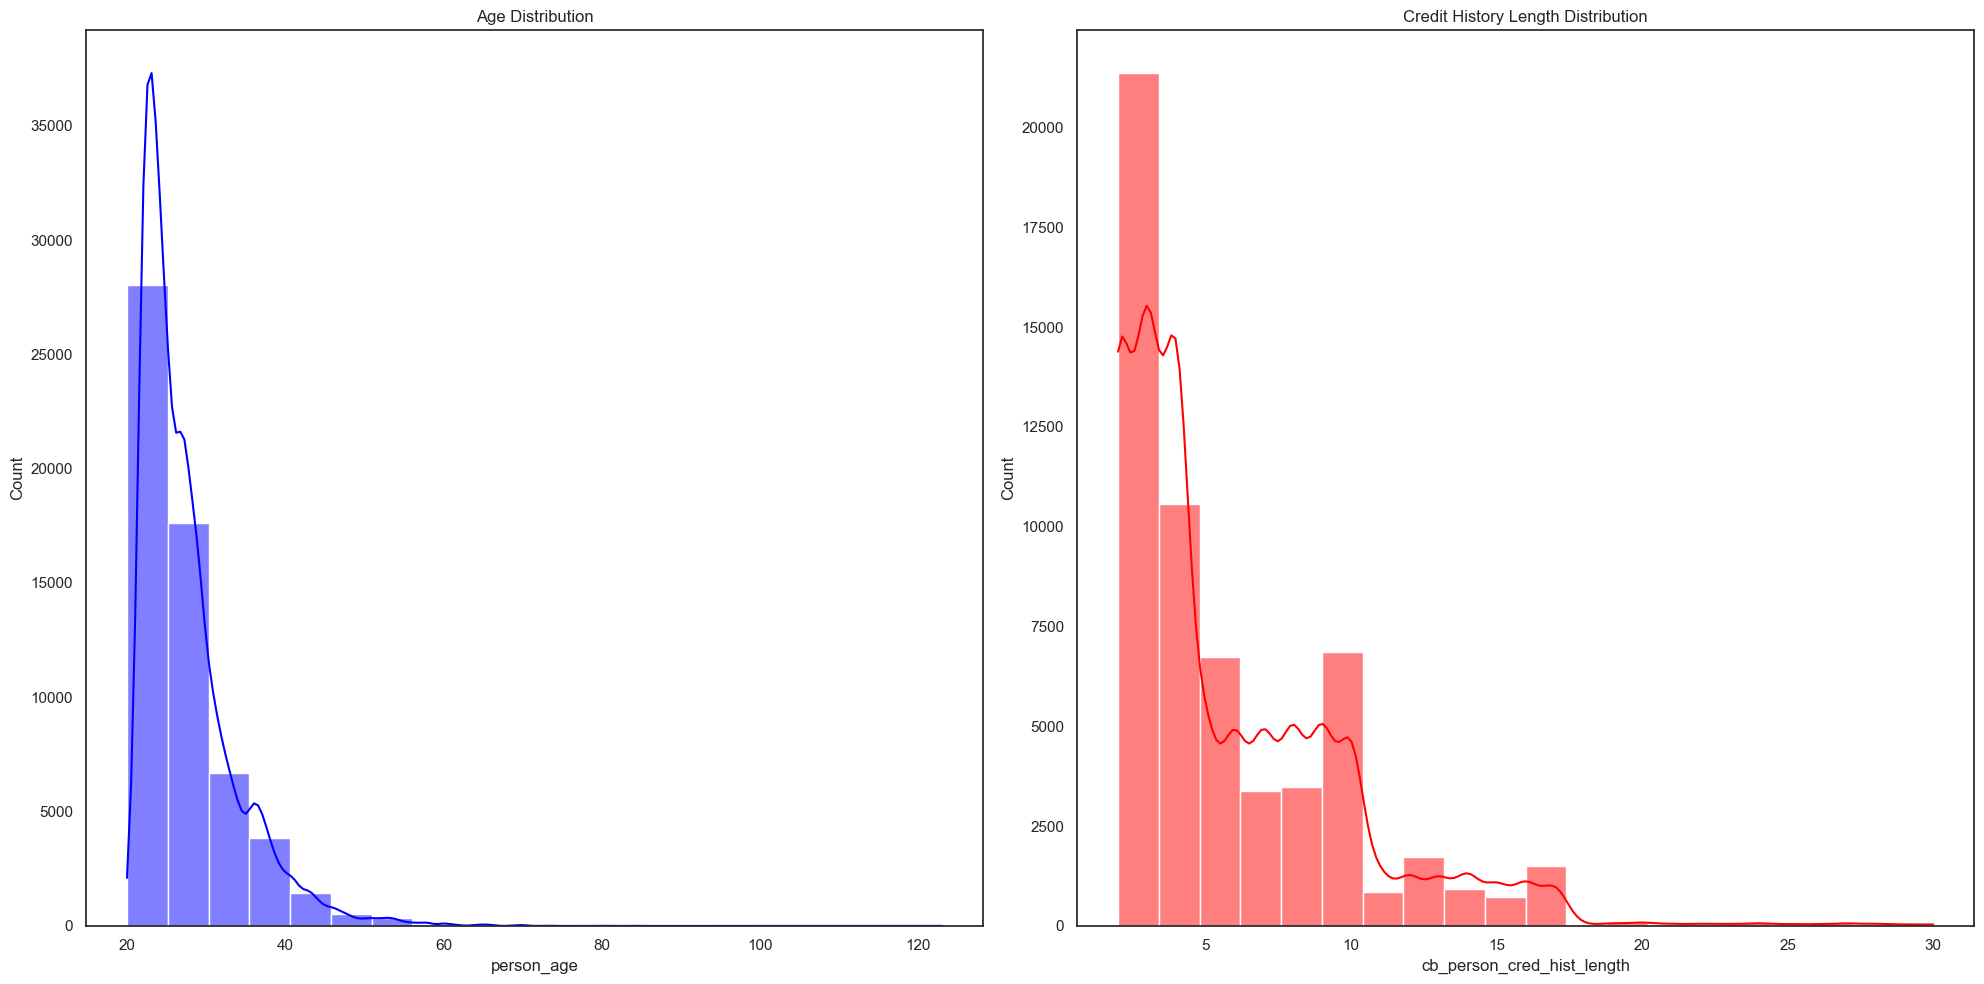

In [21]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(df['person_age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True, color='red')
plt.title('Credit History Length Distribution')

plt.tight_layout()
plt.show()

                       feature  importance
6          loan_percent_income    0.235148
5                loan_int_rate    0.137837
2                person_income    0.100828
18                loan_grade_D    0.072907
10  person_home_ownership_RENT    0.068636
4                    loan_amnt    0.067342
0                           id    0.062224
3            person_emp_length    0.054729
1                   person_age    0.041925
7   cb_person_cred_hist_length    0.033295


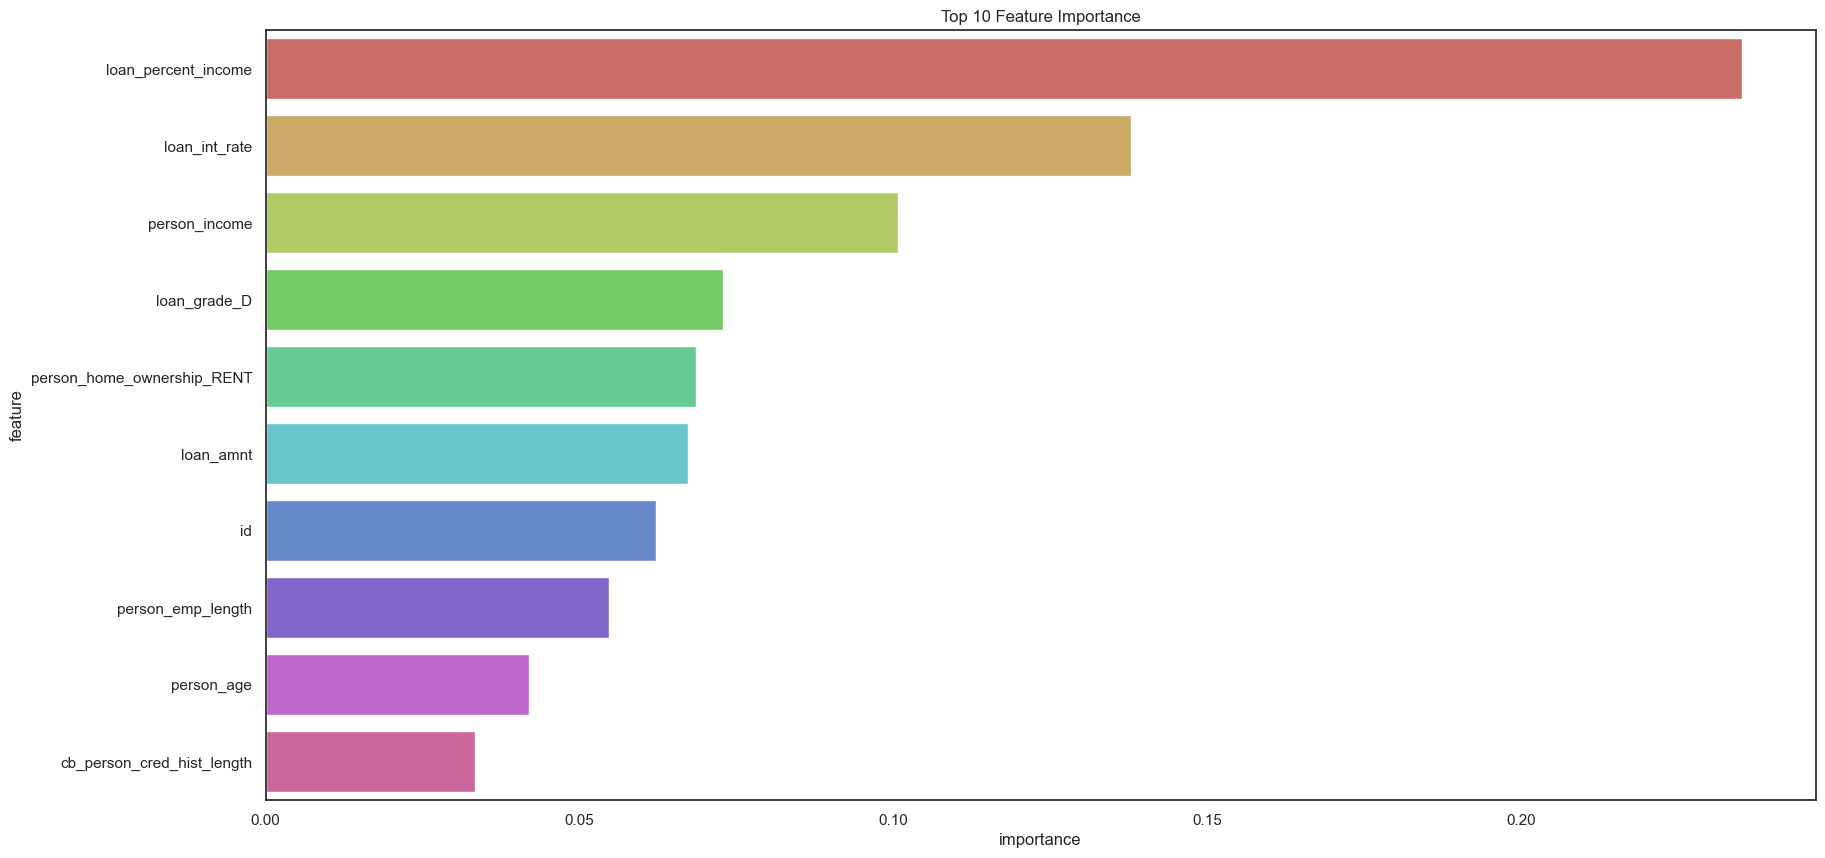

In [23]:
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({'feature': X.columns, 'importance':rf.feature_importances_})
importances.sort_values(by='importance', ascending=False, inplace=True)

print(importances.head(10))

plt.figure(figsize=(20,10))
sns.barplot(x='importance', y='feature', data=importances.head(10), palette='hls')
plt.title('Top 10 Feature Importance')
plt.show()

## Data Cleaning

In [30]:
drop_cols = ['id','person_age', 'cb_person_cred_hist_length']

df_cleaned = df.drop(columns=drop_cols)
df_test_cleaned = df_test.drop(columns=drop_cols)

df_test_cleaned.head()


,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file
0,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N
1,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y
2,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y
3,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N
4,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y


In [31]:
features_kept = [
	'loan_percent_income', 'loan_int_rate', 'person_income', 
    'person_home_ownership', 'loan_amnt', 'person_emp_length', 'loan_status'
]

df_e = df[features_kept]

df_final = pd.get_dummies(df_e, drop_first=True)
df_test_final = pd.get_dummies(df_test_cleaned, drop_first=True)

df_test_final.head().columns

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

## Model Building

In [32]:
X = df_final.drop('loan_status', axis=1)
y = df_final['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
sclar = StandardScaler()
X_train_scaled = sclar.fit_transform(X_train)
X_test_scaled = sclar.transform(X_test)

In [37]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [38]:
## Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [40]:
## Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

In [42]:
## XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

X = train.drop(columns=['loan_status','id'])
y = train['loan_status']

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

models = {
	'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
	'Random Forest': RandomForestClassifier(random_state=42),
	'Gradient Boosting': GradientBoostingClassifier(random_state=42),
	'XGBoost': XGBClassifier(use_label_encoder=False,eval_metric='logloss', random_state=42)
}

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
	transformers=[
		('num',numeric_transformer, num_features),
		('cat', categorical_transformer, cat_features)
	]
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

res = {}

for name, model in models.items():
	pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
	pipeline.fit(X_train, y_train)

	y_prob = pipeline.predict_proba(X_val)[:,1]

	roc_auc = roc_auc_score(y_val, y_prob)
	res[name] = roc_auc


sorted_res = sorted(res.items(), key=lambda x: x[1], reverse=True)

for name, score in sorted_res:
	print(f'{name}: {score}')



XGBoost: 0.9547262808692271
Gradient Boosting: 0.9431042198403728
Random Forest: 0.9371891160786662
Logistic Regression: 0.9049114965331457


In [ ]:
## Optimize the best model
def objective(trial):
	param = {
		'n_estimators': trial.suggest_int('n_estimators', 50, 500),
		'max_depth': trial.suggest_int('max_depth', 3, 12),
		'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
		'subsample': trial.suggest_float('subsample', 0.5, 1.0),
		'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
		'gamma': trial.suggest_float('gamma', 0, 5),
		'random_state': 42
	}

	model = Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(**param,use_label_encoder=False,eval_metric='logloss'))])

	model.fit(X_train, y_train)

	y_prob = model.predict_proba(X_val)[:,1]

	return roc_auc_score(y_val, y_prob)